In [1]:
from pathlib import Path
import torchvision.models as models
import pickle, gzip, math, torch, matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor
import numpy as np
from torch_lr_finder import LRFinder
import os

  pip install torch-lr-finder -v --global-option="amp"


In [2]:
import pixiedust
import torch
from torch import nn
import pathlib
from torch.utils.data import DataLoader
from torchvision import *

Pixiedust database opened successfully


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
torch.cuda.empty_cache()

In [5]:
transformtrain= transforms.Compose([
    transforms.Resize((124,124)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),              #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [6]:
transformvalid= transforms.Compose([
    transforms.Resize((124,124)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    #convert the value to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])         # convert all the value form -1 to 1 for all RGB
])

In [7]:
model = models.vgg16(pretrained=True).to(device)

In [9]:
pwd

'C:\\Users\\Iconsense\\abhishek\\bird'

In [10]:
traindata=datasets.ImageFolder('train' , transform=transformtrain)

In [11]:
valdata=datasets.ImageFolder('valid', transform=transformvalid)

In [12]:
trainloader=DataLoader(traindata, batch_size=64, shuffle=True)

In [14]:
valloader=DataLoader(valdata,batch_size=64,shuffle=True)

In [15]:
len(valloader)

15

In [16]:
import glob
import os

path='train'

In [25]:
import glob
import os

# Print png images in folder C:\Users\admin\
classes=[]
for filepath in glob.iglob(r"train/*"):
    print(filepath[6:])
    classes.append(filepath[6:])

ALBATROSS
ALEXANDRINE PARAKEET
AMERICAN AVOCET
AMERICAN BITTERN
AMERICAN COOT
AMERICAN GOLDFINCH
AMERICAN KESTREL
AMERICAN PIPIT
AMERICAN REDSTART
ANHINGA
ANNAS HUMMINGBIRD
ANTBIRD
ARARIPE MANAKIN
BALD EAGLE
BALTIMORE ORIOLE
BANANAQUIT
BAR-TAILED GODWIT
BARN OWL
BARN SWALLOW
BAY-BREASTED WARBLER
BELTED KINGFISHER
BIRD OF PARADISE
BLACK FRANCOLIN
BLACK SKIMMER
BLACK SWAN
BLACK THROATED WARBLER
BLACK VULTURE
BLACK-CAPPED CHICKADEE
BLACK-NECKED GREBE
BLACK-THROATED SPARROW
BLACKBURNIAM WARBLER
BLUE GROUSE
BLUE HERON
BOBOLINK
BROWN NOODY
BROWN THRASHER
CACTUS WREN
CALIFORNIA CONDOR
CALIFORNIA GULL
CALIFORNIA QUAIL
CANARY
CAPE MAY WARBLER
CARMINE BEE-EATER
CASPIAN TERN
CASSOWARY
CHARA DE COLLAR
CHIPPING SPARROW
CINNAMON TEAL
COCK OF THE  ROCK
COCKATOO
COMMON GRACKLE
COMMON HOUSE MARTIN
COMMON LOON
COMMON POORWILL
COMMON STARLING
COUCHS KINGBIRD
CRESTED AUKLET
CRESTED CARACARA
CROW
CROWNED PIGEON
CUBAN TODY
CURL CRESTED ARACURI
D-ARNAUDS BARBET
DARK EYED JUNCO
DOWNY WOODPECKER
EASTERN BLUEBI

In [29]:
noclass=len(classes)

In [30]:
noclass

190

In [31]:

for param in model.parameters():
    param.requires_grad=False

In [18]:
# for param in model.parameters():
#     print(param)

In [32]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [36]:
model.classifier[6:]

Sequential(
  (6): Linear(in_features=4096, out_features=1000, bias=True)
)

In [39]:
model.classifier[-1]

Linear(in_features=4096, out_features=1000, bias=True)

In [40]:
model.classifier[-1]=nn.Linear(model.classifier[-1].in_features,noclass).to(device)
criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()


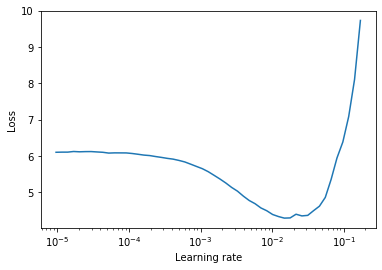

In [41]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=150, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [50]:
# optimizer=torch.optim.Adam(model.parameters(),lr=0.00001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=100, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [42]:
optimizer=torch.optim.Adam(model.parameters(),lr=1e-3)

In [43]:
optimizer.zero_grad()

In [44]:
def accuracy(out, yb): 
    return (torch.argmax(out, dim=1)==yb).float().mean()
#%%pixie_debugger

In [45]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss = loss_func(model(xb), yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
    return tloss, vloss

In [46]:
ltrain,lval = fit(6, model, criterion, optimizer, trainloader, valloader)

0 tensor(1.8778, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.6611, device='cuda:0') tensor(0.8300, device='cuda:0')
1 tensor(1.3019, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.5974, device='cuda:0') tensor(0.8366, device='cuda:0')
2 tensor(1.2276, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.6055, device='cuda:0') tensor(0.8638, device='cuda:0')
3 tensor(1.1654, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.6398, device='cuda:0') tensor(0.8569, device='cuda:0')
4 tensor(1.1806, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.5800, device='cuda:0') tensor(0.8670, device='cuda:0')
5 tensor(1.1288, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.5541, device='cuda:0') tensor(0.8735, device='cuda:0')


In [27]:
ltrain

[tensor(0.8280, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.4557, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.4056, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.3756, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.3537, device='cuda:0', grad_fn=<DivBackward0>),
 tensor(0.3474, device='cuda:0', grad_fn=<DivBackward0>)]

In [47]:
pwd

'C:\\Users\\Iconsense\\abhishek\\bird'

In [65]:
path="C:/Users/Iconsense/abhishek/bird/train1"

In [67]:
torch.save({
            
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            
            
            }, path)

In [68]:
checkpoint = torch.load(path)
model.load_state_dict(checkpoint['model_state_dict'])

optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
# optimizerB.load_state_dict(checkpoint['optimizerB_state_dict'])

# modelA.eval()
# modelB.eval()
# # - or -
model.train()
# modelB.train()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [37]:
lval

[tensor(0.4978, device='cuda:0'),
 tensor(0.4229, device='cuda:0'),
 tensor(0.4007, device='cuda:0'),
 tensor(0.3811, device='cuda:0'),
 tensor(0.3577, device='cuda:0'),
 tensor(0.3652, device='cuda:0')]

In [38]:
# tloss=np.array(losstrain)
# vloss=np.array(lossval)

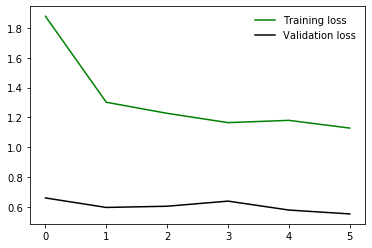

In [69]:
plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()

In [70]:
from PIL import Image
import numpy as np

In [73]:
img = Image.open('train/AMERICAN AVOCET/001.jpg')

In [74]:
nimg = np.array(img)

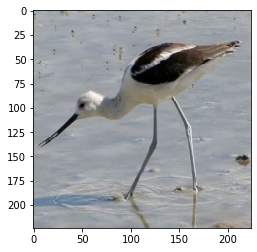

In [75]:
plt.imshow(nimg)


In [76]:
nimg = transformvalid(img).unsqueeze(0).to(device)

In [77]:
nimg.shape

torch.Size([1, 3, 124, 124])

In [78]:
prediction = model(nimg)

In [79]:
_, tpredict = torch.max(prediction.data, 1)

In [80]:
classes[tpredict[0].item()]

'AMERICAN AVOCET'

In [60]:
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [61]:
for param in model.parameters():
    param.requires_grad = True
optimizer=torch.optim.Adam(model.parameters(),lr=0.00000001)   
"""optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 1e-2},
                {'params': model.layer2.parameters(), 'lr': 1e-4},
            
            ], lr=1e-1)"""

"optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},\n                {'params': model.layer1.parameters(), 'lr': 1e-2},\n                {'params': model.layer2.parameters(), 'lr': 1e-4},\n            \n            ], lr=1e-1)"

Stopping early, the loss has diverged
Learning rate search finished. See the graph with {finder_name}.plot()



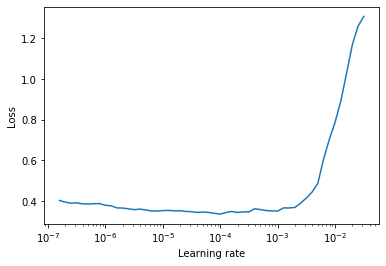

In [62]:
lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
lr_finder.range_test(trainloader, end_lr=100, num_iter=100)
lr_finder.plot() # to inspect the loss-learning rate graph
lr_finder.reset() # to reset the model and optimizer to their initial state

In [66]:
for param in model.parameters():
    param.requires_grad = True
    
optimizer = torch.optim.Adam([{'params': model.layer4.parameters()},
                {'params': model.layer1.parameters(), 'lr': 5e-7},
                 {'params': model.layer2.parameters(), 'lr': 1e-6},
                {'params': model.layer3.parameters(), 'lr': 1e-5}
            ], lr=1e-4)

In [67]:
def fit(epochs, model, loss_func, opt, train_dl, valid_dl):
    tloss=[]
    vloss=[]
    
    for epoch in range(epochs):
        # Handle batchnorm / dropout
        model.train()
        tot_train=0
#         print(model.training)
        for xb,yb in train_dl:
            xb, yb = xb.to(device), yb.to(device)
            loss = loss_func(model(xb), yb)
            tot_train+=loss
            loss.backward()
            opt.step()
            opt.zero_grad()
        nt=len(train_dl)
        
        
        model.eval()
#         print(model.training)
        with torch.no_grad():
            tot_loss,tot_acc = 0.,0.
            for xb,yb in valid_dl:
                xb, yb = xb.to(device), yb.to(device)
                pred = model(xb)
                tot_loss += loss_func(pred, yb)
                tot_acc  += accuracy (pred,yb)
        nv = len(valid_dl)
        tloss.append(tot_train/nt)
        vloss.append(tot_loss/nv)
        print(epoch,tot_train/nt, tot_loss/nv, tot_acc/nv)
    return tloss, vloss

In [68]:
ltrain,lval = fit(6, model, criterion, optimizer, trainloader, valloader)

0 tensor(0.0353, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.2867, device='cuda:0') tensor(0.9277, device='cuda:0')
1 tensor(0.0212, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.3138, device='cuda:0') tensor(0.9247, device='cuda:0')
2 tensor(0.0189, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.3912, device='cuda:0') tensor(0.9130, device='cuda:0')
3 tensor(0.0213, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.3768, device='cuda:0') tensor(0.9201, device='cuda:0')
4 tensor(0.0161, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.3603, device='cuda:0') tensor(0.9233, device='cuda:0')
5 tensor(0.0170, device='cuda:0', grad_fn=<DivBackward0>) tensor(0.3613, device='cuda:0') tensor(0.9261, device='cuda:0')


In [245]:
# criterion = nn.CrossEntropyLoss()
# optimizer=torch.optim.Adam(model.parameters(),lr=0.000001)
# lr_finder = LRFinder(model, optimizer, criterion, device="cuda")
# lr_finder.range_test(trainloader, val_loader=valloader, end_lr=1, num_iter=100, step_mode="linear")
# lr_finder.plot(log_lr=False)
# lr_finder.reset()

In [246]:
# for param in model.features.parameters():
#     param.requires_grad = True
    
# optimizer = torch.optim.Adam([{'params': model.classifier.parameters()},
#                 {'params': model.features.parameters(), 'lr': 0.00001}
#             ], lr=0.002)

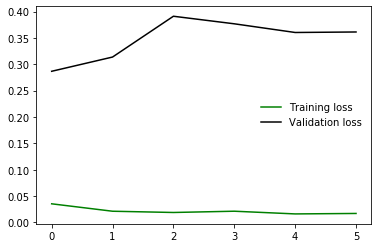

In [69]:

plt.plot(ltrain, label='Training loss', color='green')
plt.plot(lval, label='Validation loss', color ='black')
plt.legend(frameon=False)
plt.show()